# **Predição de Sobrevivência de Pacientes com Cirrose**

**[Base de Dados proveniente do Kaggle](https://www.kaggle.com/datasets/joebeachcapital/cirrhosis-patient-survival-prediction)**

## **Objetivo**

**Investigar o efeito do tratamento utilizando a droga D-penicillamine**

## **Sobre o Dataset**

**Essa base de dados contém dados de pacientes da [Mayo Clinic](https://www.mayoclinic.org/) que participaram de um estudo entre os anos de 1974 e 1984 para análisar a efetividade da droga D-penicillamine no tratamento de pacientes com Cirrose Hepática**
* **Tamanho da Amostra**: Inicialmente haviam 424 pacientes, porém somente 312 pacientes optaram por participarem do teste, foi feito o acompanhamento dos 112 restantes dos quais 6 rapidamente ficaram irrastreáveis. (para essa análise será utilizado a informação dos 312 pacientes que optaram por participar do teste)
* A base consiste em 17 parâmetros clínicos e o status do paciente (0 = Morto, 1 = Censurado, 2 = Censurado por transplante de fígado)

### **Tabela de Variáveis**

|Variable Name|Role|Type|Demographic|Description|Units|Missing Values|
|-------------|----|----|-----------|-----------|-----|--------------|
|ID|ID|Integer||unique identifier||no|
|N_Days|Other|Integer||number of days between registration and the earlier of death, transplantation, or study analysis time in July 1986||no|
|Status|Target|Categorical||status of the patient C (censored), CL (censored due to liver tx), or D (death)||no|
|Drug|Feature|Categorical||type of drug D-penicillamine or placebo||yes|
|Age|Feature|Integer|Age|age|days|no|
|Sex|Feature|Categorical|Sex|M (male) or F (Female)||no|
|Ascites|Feature|Categorical||presence of ascites N (No) or Y (Yes)||yes|
|Hepatomegaly|Feature|Categorical||presence of hepatomegaly N (No) or Y (Yes)||yes|
|Spiders|Feature|Categorical||presence of spiders N (No) or Y (Yes)||yes|
|Edema|Feature|Categorical||presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy)||no|
|Bilirubin|Feature|Constinuos||serum bilirubin|mg/dl|no|
|Cholesterol|Feature|Integer||serum cholesterol|mg/dl|yes|
|Albumin|Feature|Continuous||albumin|gm/dl|no|
|Copper|Feature|Integer||urine copper|ug/day|yes|
|Alk_Phos|Feature|Continuous||alkaline phosphatase|U/liter|yes|
|SGOT|Feature|Continuous||SGOT|U/ml|yes|
|Tryglicerides|Feature|Integer||tryglicerides||yes|
|Platelets|Feature|Integer||platelets per cubic|ml/1000/yes|
|Prothrombin|Feature|Continuous||prothrombin time|s|yes|
|Stage|Feature|Categorical||histologic stage of disease (1,2,3 or 4)||yes|

## **Pré-Processamento de dados**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [55]:
dataset = pd.read_csv('cirrhosis.csv')
dataset.dtypes

ID                 int64
N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
dtype: object

In [56]:
# Remoção do Campo ID pois o mesmo não é útil para a análise
dataset = dataset.drop(columns=['ID'])

# Remoção dos Pacientes que não fizeram parte do teste
dataset = dataset[dataset.Drug.notna()]

# Remoção dos Pacientes que foram censurados devido a transplante de fígado
dataset = dataset[dataset.Status.isin(['C','D'])]

# Divisão da idade por 365 (convertendo idade de dias para Anos)
dataset.Age = np.round(dataset.Age/365,0)

In [57]:
# Como sabemos que alguns campos tem valores em branco (mesmo com os pacientes que participaram do teste) temos 2 opções: 
# 1 - Remover todos os registros com valores em branco
# 2 - Preencher os valores em branco (preenchimento com média, último valor ou primeiro valor)
# Para essa análise vou optar pela remoção dos registros com valores em branco

quantidade_antes = len(dataset)
print(f'Quantidade antes da remoção: {quantidade_antes}')
dataset = dataset.dropna()
quantidade_depois = len(dataset)
print(f'Qauntidade após remoção: {quantidade_depois}')
print(f'Porcentagem de registros removidos: {100-(quantidade_depois/quantidade_antes)*100:.2f}%')

Quantidade antes da remoção: 293
Qauntidade após remoção: 258
Porcentagem de registros removidos: 11.95%


In [61]:
campos_correcao_tipo = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Cholesterol', 'Copper', 'Tryglicerides', 'Platelets', 'Stage', 'Age']
correcao_tipo = ['category' , 'category', 'category', 'category', 'category', 'category', 'category', 'int64', 'int64', 'int64', 'int64', 'category', 'int64']

try:
    for campo, tipo in zip(campos_correcao_tipo, correcao_tipo):
        dataset[campo] = dataset[campo].astype(tipo)
except:
    print(campo)

dataset.dtypes

N_Days              int64
Status           category
Drug             category
Age                 int64
Sex              category
Ascites          category
Hepatomegaly     category
Spiders          category
Edema            category
Bilirubin         float64
Cholesterol         int64
Albumin           float64
Copper              int64
Alk_Phos          float64
SGOT              float64
Tryglicerides       int64
Platelets           int64
Prothrombin       float64
Stage            category
dtype: object

In [62]:
quantidade_droga = len(dataset[dataset.Drug == 'D-penicillamine'])
print(f'quantidade de pessoas em tratamento: {quantidade_droga}')
print(f'quantidade de pessoas usando placebo: {quantidade_depois-quantidade_droga}')

quantidade de pessoas em tratamento: 127
quantidade de pessoas usando placebo: 131


## **Análise exploratória**

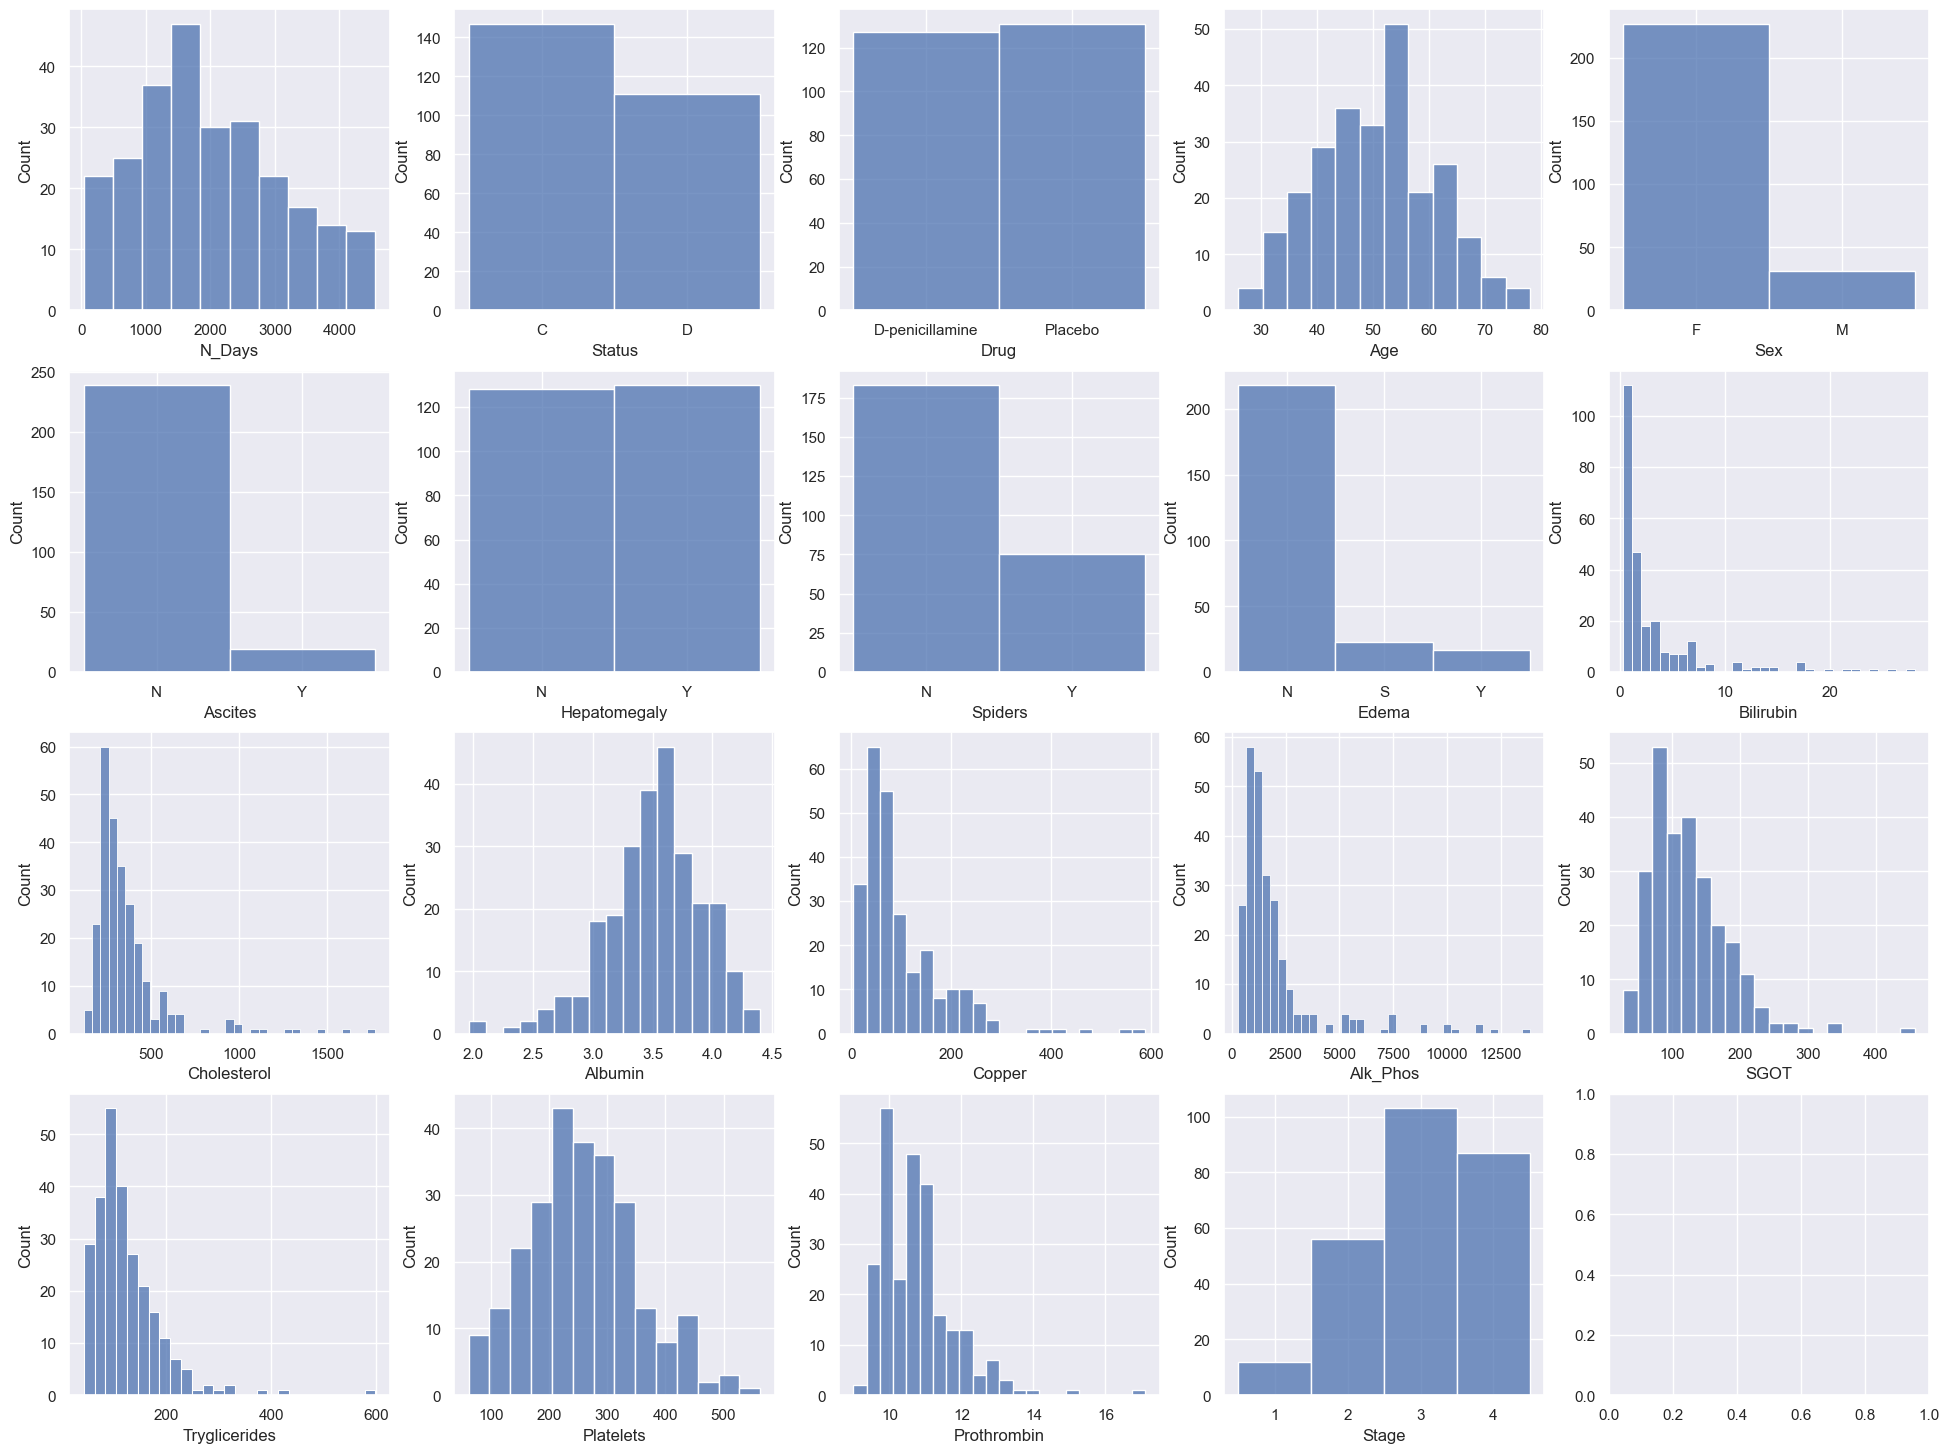

In [63]:
fig,ax = plt.subplots(4,5)
fig.set_figheight(18)
fig.set_figwidth(24)

linha = 0
coluna = 0
for i, column in enumerate(dataset.columns):
    if i>0 and i%5 == 0: 
        linha+=1
        coluna=0
    sns.histplot(data=dataset,x=column,ax=ax[linha,coluna])
    coluna+=1

plt.show()


* Podemos notar no histograma de N_Days uma assimetria positiva
* Temos um maior número de dados censurados (pessoas que deixaram o estudo ou que sobreviveram o período completo do mesmo) do que de mortes confirmadas
* Temos uma quantidade quase idêntica de pacientes fazendo o uso da droga e de placebo
* A maior parte dos pacientes possuí idades na faixa 40-60
* Temos uma predominância de mulheres participando do estudo
* A maioria dos pacientes não apresentaram Ascites ou Edema
* A quantidade de pacientes com e sem Hepatomegaly é quase idêntica
* Uma grande parte dos pacientes não possuí Spiders
* Tirando Albumin e Platelets a maioria dos parâmetros médicos possuí assimetria a direita

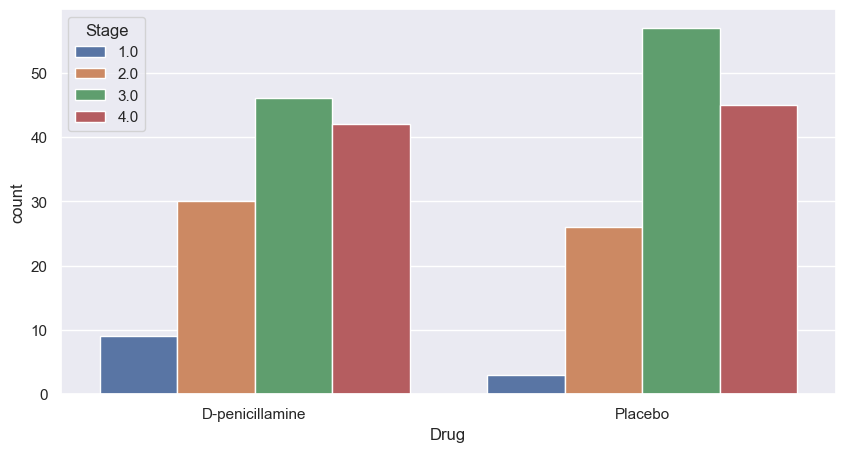

In [65]:
plt.figure(figsize=(10,5))
sns.countplot(dataset, x='Drug', hue='Stage')
plt.show()

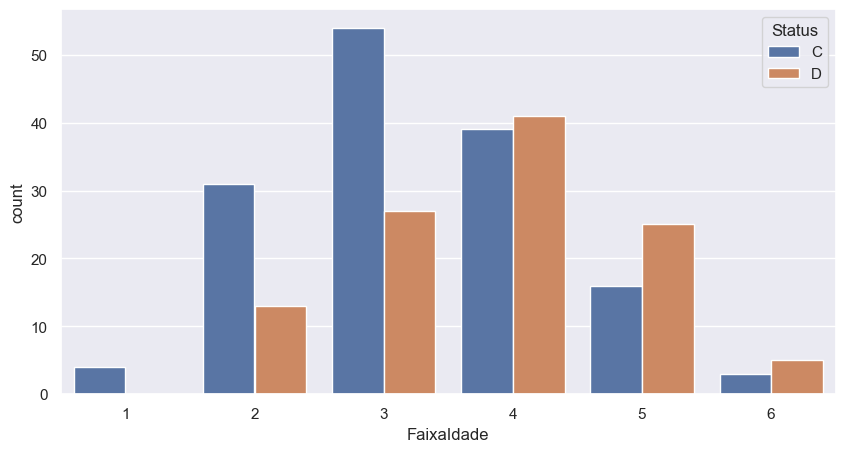

In [84]:
curiosidade = dataset[['Age','Status']].copy()
curiosidade['FaixaIdade'] = 0
for idade in curiosidade.Age.unique():
    if idade >= 20 and idade < 31:
        curiosidade.loc[curiosidade.Age == idade, 'FaixaIdade'] = 1
    elif idade > 30 and idade < 41:
        curiosidade.loc[curiosidade.Age == idade, 'FaixaIdade'] = 2
    elif idade > 40 and idade < 51:
        curiosidade.loc[curiosidade.Age == idade, 'FaixaIdade'] = 3
    elif idade > 50 and idade < 61:
        curiosidade.loc[curiosidade.Age == idade, 'FaixaIdade'] = 4
    elif idade > 60 and idade < 71:
        curiosidade.loc[curiosidade.Age == idade, 'FaixaIdade'] = 5
    else:
        curiosidade.loc[curiosidade.Age == idade, 'FaixaIdade'] = 6

plt.figure(figsize=(10,5))
sns.countplot(curiosidade, x='FaixaIdade', hue='Status')
plt.show()

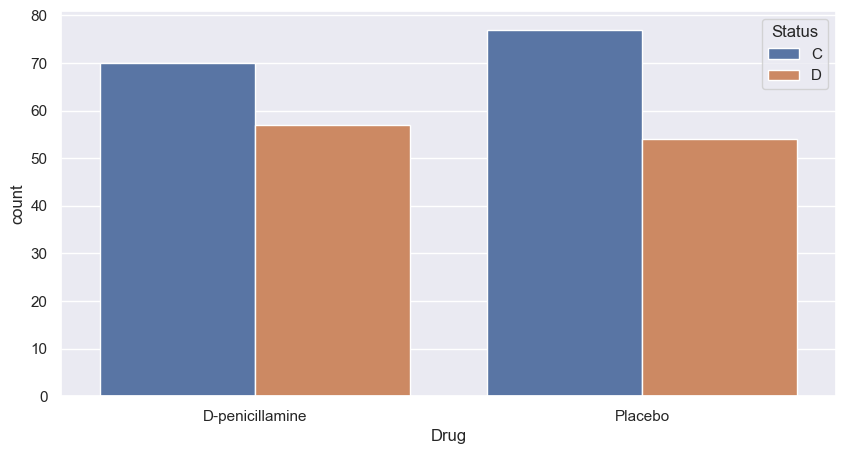

In [85]:
plt.figure(figsize=(10,5))
sns.countplot(dataset, x='Drug', hue='Status')
plt.show()

In [7]:
from lifelines import KaplanMeierFitter, NelsonAalenFitter
from lifelines.statistics import logrank_test

In [8]:
dataset.Drug.unique()

['D-penicillamine', 'Placebo']
Categories (2, object): ['D-penicillamine', 'Placebo']

In [9]:
dataset.Status.unique()

['D', 'C']
Categories (2, object): ['C', 'D']

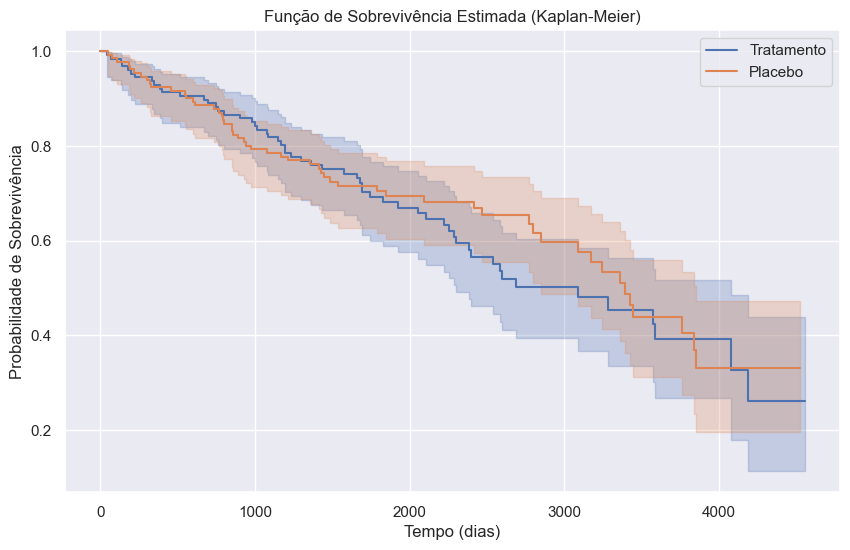

In [10]:
dataset_tratado = dataset.copy()
dataset_tratado.Status = dataset_tratado.Status.map({'C':0, 'D':1})

# Separação dos dados (em tratamento e placebo)
grupo_a = dataset_tratado[dataset_tratado.Drug == 'D-penicillamine'].copy()
grupo_b = dataset_tratado[dataset_tratado.Drug == 'Placebo'].copy()

# Estimação de Kaplan-Meier
kmf_a = KaplanMeierFitter()
kmf_b = KaplanMeierFitter()

# Ajustar os modelos
kmf_a.fit(durations=grupo_a.N_Days, event_observed=grupo_a.Status, label='Tratamento')
kmf_b.fit(durations=grupo_b.N_Days, event_observed=grupo_b.Status, label='Placebo')

# Visualização
plt.figure(figsize=(10,6))
kmf_a.plot_survival_function(ci_show=True)
kmf_b.plot_survival_function(ci_show=True)
plt.title('Função de Sobrevivência Estimada (Kaplan-Meier)')
plt.xlabel('Tempo (dias)')
plt.ylabel('Probabilidade de Sobrevivência')
plt.grid(True)
plt.show()

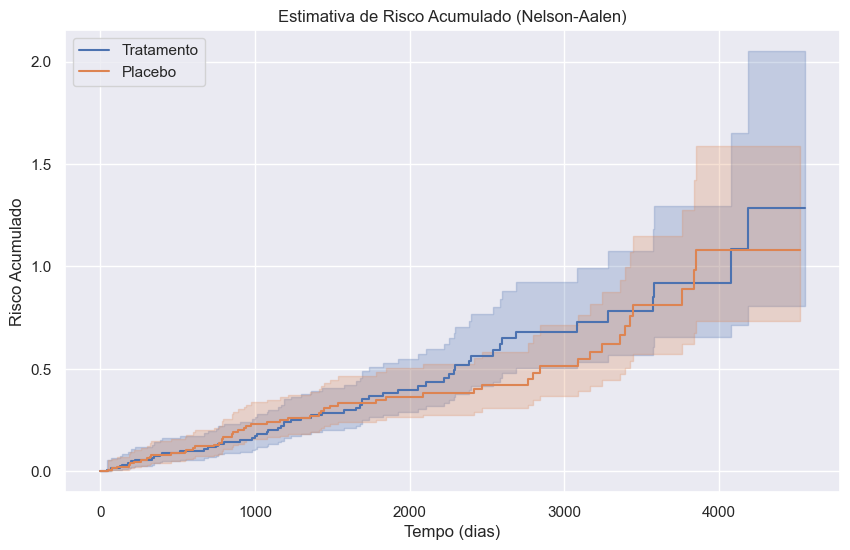

In [11]:
# Estimação de Kaplan-Meier
naf_a = NelsonAalenFitter()
naf_b = NelsonAalenFitter()

# Ajustar os modelos
naf_a.fit(durations=grupo_a.N_Days, event_observed=grupo_a.Status, label='Tratamento')
naf_b.fit(durations=grupo_b.N_Days, event_observed=grupo_b.Status, label='Placebo')

# Visualização
plt.figure(figsize=(10,6))
naf_a.plot_cumulative_hazard(ci_show=True)
naf_b.plot_cumulative_hazard(ci_show=True)
plt.title('Estimativa de Risco Acumulado (Nelson-Aalen)')
plt.xlabel('Tempo (dias)')
plt.ylabel('Risco Acumulado')
plt.grid(True)
plt.show()

In [12]:
# Teste de Log-Rank (para saber se a diferença entre pacientes tratados e não tratados é relevante)

logrank_result = logrank_test(
    grupo_a.N_Days, grupo_b.N_Days,
    event_observed_A=grupo_a.Status, event_observed_B=grupo_b.Status
)

# Exibindo o resultado do teste
print("Resultado do Teste de Log-Rank")
print(f"Estatística do teste: {logrank_result.test_statistic:.4f}")
print(f"Valor-p: {logrank_result.p_value:.4f}")

# Interpretação
if logrank_result.p_value < 0.05:
    print("Rejeitamos a hipótese nula: As curvas de sobrevivência são significativamente diferentes.")
else:
    print("Não rejeitamos a hipótese nula: Não há diferença significativa entre as curvas de sobrevivência.")

Resultado do Teste de Log-Rank
Estatística do teste: 0.3331
Valor-p: 0.5638
Não rejeitamos a hipótese nula: Não há diferença significativa entre as curvas de sobrevivência.
